In [3]:
from sunpy.net import Fido
from sunpy.net import attrs as a

event_type = "FL"
tstart = "2023/05/01"
tend = "2023/05/07"
result = Fido.search(a.Time(tstart, tend),
                     a.hek.EventType(event_type),
                     a.hek.FL.GOESCls > "M1.0",
                     a.hek.OBS.Observatory == "GOES")

hek_results = result["hek"]

filtered_results = hek_results["event_starttime", "event_peaktime", 
                               "event_endtime", "fl_goescls", "ar_noaanum"]

filtered_results.write("may_2023_M1_flares.csv", format="csv", overwrite=True)


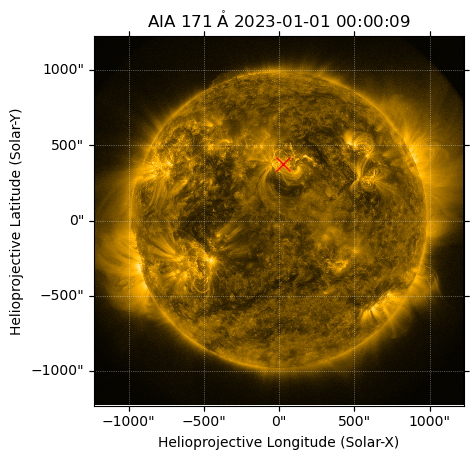

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import sunpy.map

# Specify the local file path to your FITS file
file_path = "C:\\Users\\Vaidik Sharma\\Downloads\\aia_science_level2.0171.20230101_000009.fits"  # Replace with your actual file path

# Load the image
aia_map = sunpy.map.Map(file_path)

# Find the brightest pixel
pixel_pos = np.argwhere(aia_map.data == aia_map.data.max()) * u.pixel
hpc_max = aia_map.wcs.pixel_to_world(pixel_pos[:, 1], pixel_pos[:, 0])

# Plot the image and the brightest pixel
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)
ax.plot_coord(hpc_max, 'rx', fillstyle='none', markersize=10)
plt.show()
